In [62]:
numSampleBytes = 28
numSweepBytes = 4 + 1 + numSampleBytes * 2 * 2 # 4 times bytes, 1 id byte, 2 bytes per sample per 2 pips
numIMUBytes = 4 + (3 + 3 + 3 + 1) * 2 # 4 time bytes, xyz for agm each 2 bytes, 2 temp bytes

aScale = 4*9.8; mScale = 1.; gScale = 2000./360

f = open('.\lamp_shield24_sweepE01_230k_1.txt','rb')
rawBytes = f.read()
numBytes = len(rawBytes)
def conc(word):
    if len(word) == 2:
        return (word[1]<<8) | word[0]
    if len(word) == 4:
        return (word[3]<<24) | (word[2]<<16) | (word[1]<<8) | word[0]

sweepTime = []
payloadID = []
pip0Voltages = []
pip1Voltages = []
IMUTime = []
ax = []; ay = []; az = [] 
mx = []; my = []; mz = []
gx = []; gy = []; gz = []
IMUTemp = []

raw = b''

for i in range(numBytes):
    if rawBytes[i] == 35: # byte is #: start of data
        if rawBytes[i+1] == 83: # byte is "S": start of sweep data
            if i+numSweepBytes+2 <= numBytes:
                if rawBytes[i+numSweepBytes+2] == 35: # next "#" correct number of sweep bytes
                    sweepBytes = rawBytes[i+2:i+numSweepBytes+2]
                    pip0Bytes = sweepBytes[5:5+2*numSampleBytes]
                    pip1Bytes = sweepBytes[5+2*numSampleBytes:]
                    for sample in range(0,2*numSampleBytes,2):
                        sweepTime.append(conc(sweepBytes[0:4])) # copy for each sample
                        payloadID.append(sweepBytes[4])
                        pip0Voltages.append(conc(pip0Bytes[sample:sample+2])*5/2**14)
                        pip1Voltages.append(conc(pip1Bytes[sample:sample+2])*5/2**14)
        elif rawBytes[i+1] == 73: # byte is "I": start of IMU data
            if i+numIMUBytes+2 <= numBytes:
                if rawBytes[i+numIMUBytes+2] == 35: # next "#" correct number of IMU bytes
                    IMUBytes = rawBytes[i+2:i+numIMUBytes+2]
                    IMUTime.append(conc(IMUBytes[0:4]))
                    ax.append(conc(IMUBytes[4:6])*aScale/2**15)
                    ay.append(conc(IMUBytes[6:8])*aScale/2**15)
                    az.append(conc(IMUBytes[8:10])*aScale/2**15)
                    mx.append(conc(IMUBytes[10:12])*mScale/2**15)
                    my.append(conc(IMUBytes[12:14])*mScale/2**15)
                    mz.append(conc(IMUBytes[14:16])*mScale/2**15)
                    gx.append(conc(IMUBytes[16:18])*gScale/2**15)
                    gy.append(conc(IMUBytes[18:20])*gScale/2**15)
                    gz.append(conc(IMUBytes[20:22])*gScale/2**15)
                    IMUTemp.append(conc(IMUBytes[22:24]))

(0.95, 1.6)

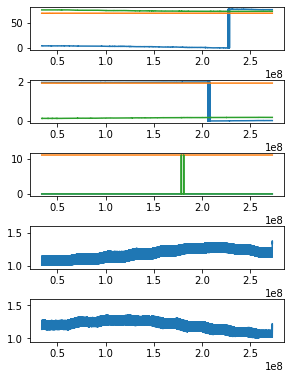

In [63]:
import matplotlib.pyplot as plt
import numpy as np

ylimPip = [0.95, 1.6]

gs_left = plt.GridSpec(6, 2,  hspace=0.7)
fig = plt.figure(figsize=(10, 7.5))

axis1 = fig.add_subplot(gs_left[0,0])
plt.plot(IMUTime, ax)
plt.plot(IMUTime, ay)
plt.plot(IMUTime, az)

axis1 = fig.add_subplot(gs_left[1,0])
plt.plot(IMUTime, mx)
plt.plot(IMUTime, my)
plt.plot(IMUTime, mz)

axis1 = fig.add_subplot(gs_left[2,0])
plt.plot(IMUTime, gx)
plt.plot(IMUTime, gy)
plt.plot(IMUTime, gz)

axis4 = fig.add_subplot(gs_left[3,0])
plt.plot(sweepTime, pip0Voltages)
plt.ylim(ylimPip)

axis5 = fig.add_subplot(gs_left[4,0])
plt.plot(sweepTime, pip1Voltages)
plt.ylim(ylimPip)